In [963]:
# -*- coding: utf-8 -*-

# 导入pandas，numpy，matplotlib.pyplot包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

file_name = '/Users/fountain/Downloads/python2/hospital.xlsx'
# 创建一个ExcelFile实例
xls_file = pd.ExcelFile(file_name, dtype='object')
# 存放在某个工作表中的数据可以通过parse读取到DataFrame中 
table = xls_file.parse('Sheet1', dtype='object') 
print type(xls_file)
print type(table)
table.head() # 默认获取前5行

<class 'pandas.io.excel.ExcelFile'>
<class 'pandas.core.frame.DataFrame'>


,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,001616528,236701,强力VC银翘片,6,82.8,69
1,2018-01-02 星期六,001616528,236701,清热解毒口服液,1,28,24.64
2,2018-01-06 星期三,0012602828,236701,感康,2,16.8,15
3,2018-01-11 星期一,0010070343428,236701,三九感冒灵,1,28,28
4,2018-01-15 星期五,00101554328,236701,三九感冒灵,8,224,208


In [964]:
# 查看基本信息
print table.shape   # table有几行几列
print table.index  # 索引
print table.columns  # 有哪些列

(6578, 7)
RangeIndex(start=0, stop=6578, step=1)
Index([u'购药时间', u'社保卡号', u'商品编码', u'商品名称', u'销售数量', u'应收金额', u'实收金额'], dtype='object')


In [965]:
print table.info()
print table.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Data columns (total 7 columns):
购药时间    6576 non-null object
社保卡号    6576 non-null object
商品编码    6577 non-null object
商品名称    6577 non-null object
销售数量    6577 non-null object
应收金额    6577 non-null object
实收金额    6577 non-null object
dtypes: object(7)
memory usage: 359.8+ KB
None
购药时间    6576
社保卡号    6576
商品编码    6577
商品名称    6577
销售数量    6577
应收金额    6577
实收金额    6577
dtype: int64


In [966]:
# 重命名
col = {u'购药时间':'time',
       u'社保卡号':'cardno', 
       u'商品编码':'drugId', 
       u'商品名称':'drugName', 
       u'销售数量':'saleNumber', 
       u'应收金额':'virtualMoney', 
       u'实收金额':'actualMoney'}
table.rename(columns = col, inplace = True)
table.head()

# 也可以不指定旧列名，此时传入一个list即可
# col = ['time','cardno','drugId','drugName','saleNumber','virtualMoney','actualMoney']
# table.columns = col

,time,cardno,drugId,drugName,saleNumber,virtualMoney,actualMoney
0,2018-01-01 星期五,001616528,236701,强力VC银翘片,6,82.8,69
1,2018-01-02 星期六,001616528,236701,清热解毒口服液,1,28,24.64
2,2018-01-06 星期三,0012602828,236701,感康,2,16.8,15
3,2018-01-11 星期一,0010070343428,236701,三九感冒灵,1,28,28
4,2018-01-15 星期五,00101554328,236701,三九感冒灵,8,224,208


In [967]:
# 删除缺失值

# 默认情况下 axis=0, how='any',一行中只要有一个NA，就删除 
dropdata1 = table.dropna() 
dropdata1.tail(10)  # 获取末尾的10行

# 设置了how='all'，表示一行中所有列都是NA的时候才删除
# dropdata2 = table.dropna(how = 'all')
# dropdata2.tail(10)

,time,cardno,drugId,drugName,saleNumber,virtualMoney,actualMoney
6565,2018-04-25 星期一,0010019172628,2367011,高特灵,1,5.6,5
6566,2018-04-25 星期一,0010019192628,2367011,高特灵,3,16.8,15.46
6567,2018-04-25 星期一,0010039350528,2367011,高特灵,2,11.2,9.86
6568,2018-04-26 星期二,0010052558628,2367011,高特灵,2,11.2,10
6569,2018-04-26 星期二,00108945828,2367011,高特灵,2,11.2,10
6572,2018-04-27 星期三,0010060482828,2367011,高特灵,1,5.6,5
6573,2018-04-27 星期三,00107886128,2367011,高特灵,10,56,54.8
6575,2018-04-27 星期三,0010087865628,2367011,高特灵,2,11.2,9.86
6576,2018-04-27 星期三,0013406628,2367011,高特灵,1,5.6,5
6577,2018-04-28 星期四,0011926928,2367011,高特灵,2,11.2,10


In [968]:
# split()分隔符，默认为所有的空字符，包括空格、换行(\n)、制表符(\t)等

# 处理日期
# 将time这一列中的日期和星期分开，然后生成由它们构成的list 

def split_time(time_column):
    datetime_list = [x.split()[0] for x in time_column] #列表推导式 
    week_list = [x.split()[1] for x in time_column]
    return datetime_list, week_list

datetime_list,weekday_list = split_time(dropdata1.loc[:,'time'])

# datetime_list.count('2018-04-27')
len(datetime_list)

# 将datetime_list和weekday_list加入到dropdata1中 
dropdata1.loc[:,'weekday'] = weekday_list

#加上参数 errors='coerce'，不然报错:ValueError: day is out of range for month 
dropdata1.loc[:,'datetime'] = pd.to_datetime(datetime_list, errors='coerce')
dropdata1

,time,cardno,drugId,drugName,saleNumber,virtualMoney,actualMoney,weekday,datetime
0,2018-01-01 星期五,001616528,236701,强力VC银翘片,6,82.8,69,星期五,2018-01-01
1,2018-01-02 星期六,001616528,236701,清热解毒口服液,1,28,24.64,星期六,2018-01-02
2,2018-01-06 星期三,0012602828,236701,感康,2,16.8,15,星期三,2018-01-06
3,2018-01-11 星期一,0010070343428,236701,三九感冒灵,1,28,28,星期一,2018-01-11
4,2018-01-15 星期五,00101554328,236701,三九感冒灵,8,224,208,星期五,2018-01-15
5,2018-01-20 星期三,0013389528,236701,三九感冒灵,1,28,28,星期三,2018-01-20
6,2018-01-31 星期日,00101464928,236701,三九感冒灵,2,56,56,星期日,2018-01-31
7,2018-02-17 星期三,0011177328,236701,三九感冒灵,5,149,131.12,星期三,2018-02-17
8,2018-02-22 星期一,0010065687828,236701,三九感冒灵,1,29.8,26.22,星期一,2018-02-22
9,2018-02-24 星期三,0013389528,236701,三九感冒灵,4,119.2,104.89,星期三,2018-02-24


In [973]:
dropdata1.info()
len(dropdata1['datetime'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6575 entries, 0 to 6577
Data columns (total 9 columns):
time            6575 non-null object
cardno          6575 non-null object
drugId          6575 non-null object
drugName        6575 non-null object
saleNumber      6575 non-null float64
virtualMoney    6575 non-null float64
actualMoney     6575 non-null float64
weekday         6575 non-null object
datetime        6552 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 513.7+ KB


6575

In [972]:
# 数据类型转换

# 此处出现警告 :
# SettingWithCopyWarning:A value is trying to be set on a copy of a slice from a DataFrame.
# dropdata1['saleNumber'] = dropdata1['saleNumber'].astype('float64')

dropdata1.loc[:,'saleNumber'] = dropdata1.loc[:,'saleNumber'].astype('float64')
dropdata1.loc[:,'virtualMoney'] = dropdata1.loc[:,'virtualMoney'].astype('float64')
dropdata1.loc[:,'actualMoney'] = dropdata1.loc[:,'actualMoney'].astype('float64')

dropdata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6575 entries, 0 to 6577
Data columns (total 9 columns):
time            6575 non-null object
cardno          6575 non-null object
drugId          6575 non-null object
drugName        6575 non-null object
saleNumber      6575 non-null float64
virtualMoney    6575 non-null float64
actualMoney     6575 non-null float64
weekday         6575 non-null object
datetime        6552 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 513.7+ KB


In [952]:
# 排序
# 按销售时间对数据进行降序排列 sort_values(), 
# 如果是按照多列进行排序，则写为：by=['col1', 'col2',...]

dropdata1.sort_values('time',ascending=False)

,time,cardno,drugId,drugName,saleNumber,virtualMoney,actualMoney,weekday,datetime
2404,2018-07-19 星期二,0013216828,861464,复方利血平片(复方降压片),1.0,3.7,3.3,星期二,2018-07-19
4462,2018-07-19 星期二,0010014256528,871158,厄贝沙坦片(吉加),2.0,34.0,30.0,星期二,2018-07-19
864,2018-07-19 星期二,00101409528,2367011,开博通,2.0,62.0,56.0,星期二,2018-07-19
4463,2018-07-19 星期二,0010081634128,871158,厄贝沙坦片(吉加),2.0,34.0,30.0,星期二,2018-07-19
4464,2018-07-19 星期二,001616528,871158,厄贝沙坦片(吉加),2.0,34.0,30.0,星期二,2018-07-19
5990,2018-07-19 星期二,00104002228,861435,缬沙坦胶囊(代文),5.0,179.0,171.4,星期二,2018-07-19
865,2018-07-19 星期二,0013406628,2367011,开博通,2.0,62.0,56.0,星期二,2018-07-19
3744,2018-07-19 星期二,0010019136328,865099,硝苯地平片(心痛定),2.0,2.4,2.0,星期二,2018-07-19
1432,2018-07-19 星期二,0010065621228,861435,缬沙坦胶囊(代文),2.0,71.6,64.0,星期二,2018-07-19
5338,2018-07-19 星期二,0010010733628,865099,硝苯地平片(心痛定),2.0,2.4,2.0,星期二,2018-07-19


In [953]:
#  简单数据分析
# 去重
data = pd.DataFrame({'a':[1,1,2,2]})
 
# duplicated() 返回一个布尔型Series,表示各行是否重复
data.duplicated() 

# drop_duplicates() 用于返回一个移除了重复行的DataFrame
data.drop_duplicates()

,a
0,1
2,2


In [954]:
# 月均消费次数 (同一个日期和同一个社保卡号的多个消费记录算作一次消费)
data_consume_unique = dropdata1.drop_duplicates(subset=['datetime', 'cardno']).copy(deep = True)

data_consume_unique = data_consume_unique.dropna()

# consume_time_date_ser 是将 datetime 作为 index，构建的 cardno 的时间序列。
consume_time_date_ser = pd.Series(list(data_consume_unique['cardno']), 
                                  index = data_consume_unique['datetime'])

len(consume_time_date_ser[consume_time_date_ser.isnull()])

0

In [955]:
# 排序之后，将日期结尾减去日期开头，计算总天数

date_interval = consume_time_date_ser.sort_index().index[-1]-consume_time_date_ser.sort_index().index[0]
month_count = date_interval.days/30 + 1  
month_consume = consume_time_date_ser.count()/month_count

print date_interval.days
print date_interval
type(date_interval)   # datetime.timedelta表示两个datetime对象之间的时间差

199
199 days 00:00:00


pandas._libs.tslib.Timedelta

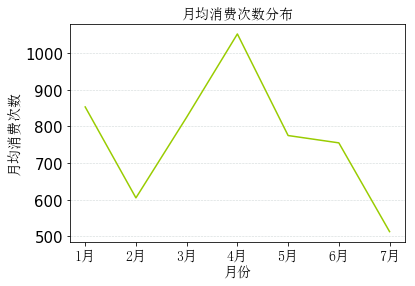

In [956]:
# 通过month分组，对组内数据进行计数
month_time = consume_time_date_ser.groupby(consume_time_date_ser.index.month).count()

a=np.array([1,2,3,4,5,6,7])

plt.plot(month_time.index, month_time,'g-', color='#99CC01')

# 设置中文字体
font_set = FontProperties(fname=r"/Users/fountain/Desktop/pandas/SimSun.ttf", size=14)  

# 添加图标网格线， 设置网格线颜色，线形，宽度和透明度
plt.grid( color='#95a5a6',linestyle='--', linewidth=0.6 ,axis='y',alpha=0.4)

plt.title(u'月均消费次数分布', fontproperties=font_set)
plt.xlabel(u'月份', fontproperties=font_set)
plt.ylabel(u'月均消费次数', fontproperties=font_set)
plt.xticks(a, (u'1月',u'2月',u'3月',u'4月',u'5月',u'6月',u'7月'), fontproperties=font_set)
plt.show()

In [957]:
# 月均消费金额
total_money = dropdata1['actualMoney'].sum()
month_money = (total_money / month_count)
month_money

43509.200000000004

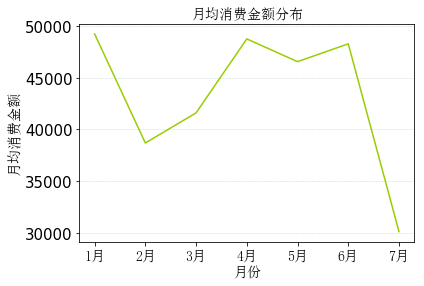

In [958]:
# 构建实收金额actualMoney的时间序列data_consume_actual
data_consume_actual = pd.Series(list(dropdata1['actualMoney']), index = list(dropdata1['datetime']))
month_consume = data_consume_actual.groupby(data_consume_actual.index.month).sum()

plt.plot(month_consume.index, month_consume, 'g-', color='#99CC01')

a=np.array([1,2,3,4,5,6,7])

# 设置中文字体
font_set = FontProperties(fname=r"/Users/fountain/Desktop/pandas/SimSun.ttf", size=14)  

# 添加图标网格线， 设置网格线颜色，线形，宽度和透明度
plt.grid( color='#95a5a6',linestyle='--', linewidth=0.6 ,axis='y',alpha=0.4)

plt.title(u'月均消费金额分布', fontproperties=font_set)
plt.xlabel(u'月份', fontproperties=font_set)
plt.ylabel(u'月均消费金额', fontproperties=font_set)
plt.xticks(a, (u'1月',u'2月',u'3月',u'4月',u'5月',u'6月',u'7月'), fontproperties=font_set)

plt.show()

In [959]:
#  客单价 , 是指商场（超市）每一个顾客平均购买商品的金额，客单价也即是平均交易金额。
consume_per = len(dropdata1['cardno'].unique())
print consume_per
pct = total_money / consume_per
print pct

2426
125.541797197


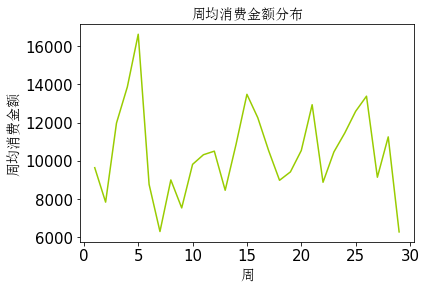

In [960]:
# 消费趋势 
week_consume = data_consume_actual.groupby(data_consume_actual.index.week).sum()
plt.plot(week_consume.index, week_consume, 'g-', color='#99CC01')

plt.title(u'周均消费金额分布', fontproperties=font_set)
plt.xlabel(u'周', fontproperties=font_set)
plt.ylabel(u'周均消费金额', fontproperties=font_set)
plt.show()